In [1]:
%config ZMQInteractiveShell.ast_node_interactivity='all'

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('result-PostSales-tk30-slope-16arrivals(Top30)-culimit1000-total40mins-Stress-Trial4-leo.jtl')
df.info()
# ax = df.plot()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77030 entries, 0 to 77029
Data columns (total 20 columns):
timeStamp          77030 non-null int64
elapsed            77030 non-null int64
label              77030 non-null object
responseCode       77030 non-null object
responseMessage    77030 non-null object
threadName         77030 non-null object
dataType           76312 non-null object
success            77030 non-null bool
failureMessage     0 non-null float64
bytes              77030 non-null int64
sentBytes          77030 non-null int64
grpThreads         77030 non-null int64
allThreads         77030 non-null int64
URL                77030 non-null object
Latency            77030 non-null int64
SampleCount        77030 non-null int64
ErrorCount         77030 non-null int64
Hostname           77030 non-null object
IdleTime           77030 non-null int64
Connect            77030 non-null int64
dtypes: bool(1), float64(1), int64(11), object(7)
memory usage: 11.2+ MB


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,SampleCount,ErrorCount,Hostname,IdleTime,Connect
0,1561635423442,167,/postsales/postSale/signin.jsp,200,200,bzm - Free-Form Arrivals Thread Group 1-1,text,True,NaN,13258,452,1,1,https://mallu.aig.com.cn/postsales/postSale/si...,166,1,0,KevinPT2,0,122
1,1561635423610,38,/postsales/postSale/js/gridsum.js,200,200,bzm - Free-Form Arrivals Thread Group 1-1,text,True,NaN,834,448,1,1,https://mallu.aig.com.cn/postsales/postSale/js...,38,1,0,KevinPT2,0,0
2,1561635423648,40,/postsales/postSale/css/aig.css,200,200,bzm - Free-Form Arrivals Thread Group 1-1,text,True,NaN,27047,458,1,1,https://mallu.aig.com.cn/postsales/postSale/cs...,38,1,0,KevinPT2,0,0
3,1561635423688,41,/postsales/postSale/js/jquery.mvalidate.js,200,200,bzm - Free-Form Arrivals Thread Group 1-1,text,True,NaN,10605,454,1,1,https://mallu.aig.com.cn/postsales/postSale/js...,40,1,0,KevinPT2,0,0
4,1561635423730,136,/jquery/3.3.1/jquery.min.js,200,OK,bzm - Free-Form Arrivals Thread Group 1-1,text,True,NaN,30792,404,1,1,https://cdn.bootcss.com/jquery/3.3.1/jquery.mi...,135,1,0,KevinPT2,0,100


In [4]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'], unit='ms')
df.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,SampleCount,ErrorCount,Hostname,IdleTime,Connect
0,2019-06-27 11:37:03.442,167,/postsales/postSale/signin.jsp,200,200,bzm - Free-Form Arrivals Thread Group 1-1,text,True,NaN,13258,452,1,1,https://mallu.aig.com.cn/postsales/postSale/si...,166,1,0,KevinPT2,0,122
1,2019-06-27 11:37:03.610,38,/postsales/postSale/js/gridsum.js,200,200,bzm - Free-Form Arrivals Thread Group 1-1,text,True,NaN,834,448,1,1,https://mallu.aig.com.cn/postsales/postSale/js...,38,1,0,KevinPT2,0,0
2,2019-06-27 11:37:03.648,40,/postsales/postSale/css/aig.css,200,200,bzm - Free-Form Arrivals Thread Group 1-1,text,True,NaN,27047,458,1,1,https://mallu.aig.com.cn/postsales/postSale/cs...,38,1,0,KevinPT2,0,0
3,2019-06-27 11:37:03.688,41,/postsales/postSale/js/jquery.mvalidate.js,200,200,bzm - Free-Form Arrivals Thread Group 1-1,text,True,NaN,10605,454,1,1,https://mallu.aig.com.cn/postsales/postSale/js...,40,1,0,KevinPT2,0,0
4,2019-06-27 11:37:03.730,136,/jquery/3.3.1/jquery.min.js,200,OK,bzm - Free-Form Arrivals Thread Group 1-1,text,True,NaN,30792,404,1,1,https://cdn.bootcss.com/jquery/3.3.1/jquery.mi...,135,1,0,KevinPT2,0,100


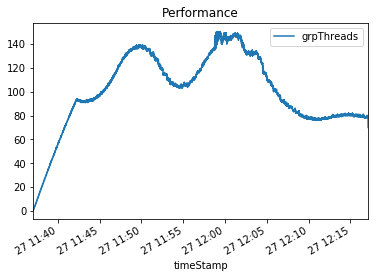

In [5]:
ax = df.plot(title="Performance", x="timeStamp", y="grpThreads")

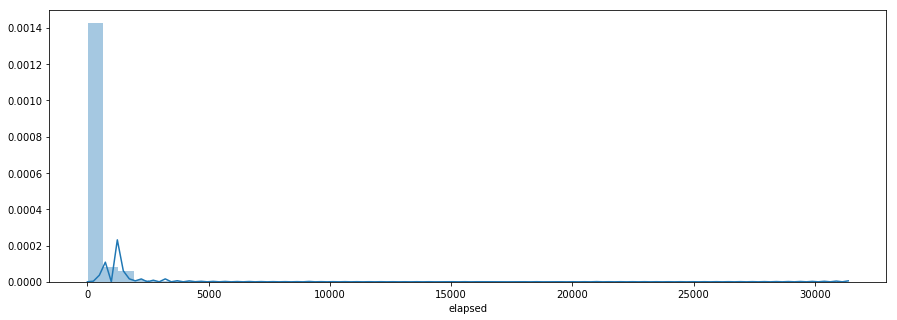

In [21]:
f, ax = plt.subplots(figsize=(15,5))
sns.distplot(df['elapsed'], bins=50, kde=True, rug=False)

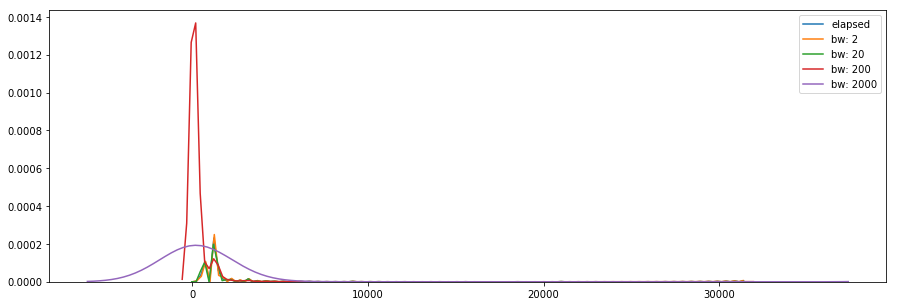

In [26]:
f, ax = plt.subplots(figsize=(15,5))
sns.kdeplot(df['elapsed'])
sns.kdeplot(df['elapsed'], bw=2, label="bw: 2")
sns.kdeplot(df['elapsed'], bw=20, label="bw: 20")
sns.kdeplot(df['elapsed'], bw=200, label="bw: 200")
sns.kdeplot(df['elapsed'], bw=2000, label="bw: 2000")

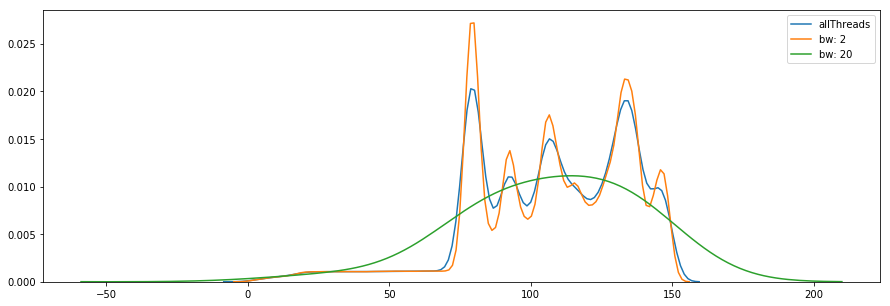

In [8]:
f, ax = plt.subplots(figsize=(15,5))
sns.kdeplot(df['allThreads'])
# sns.kdeplot(df['allThreads'], bw=1, label="bw: 1")
sns.kdeplot(df['allThreads'], bw=2, label="bw: 2")
sns.kdeplot(df['allThreads'], bw=20, label="bw: 20")
# sns.kdeplot(df['allThreads'], bw=200, label="bw: 200")
# sns.kdeplot(df['allThreads'], bw=2000, label="bw: 2000")

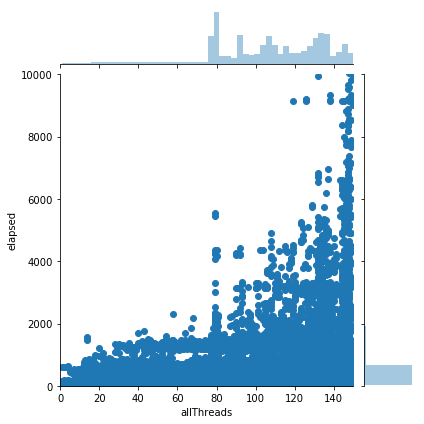

In [13]:
sns.jointplot(x='allThreads', y='elapsed', data=df, xlim={0,150}, ylim={0,10000})

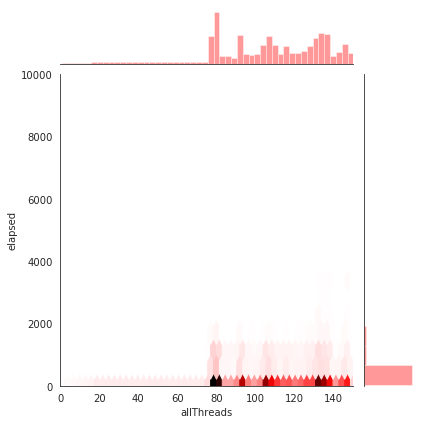

In [5]:
with sns.axes_style('white'):
    sns.jointplot(x='allThreads', y='elapsed', data=df,
              kind='hex',
              color='r',
              xlim={0,150}, ylim={0,10000})

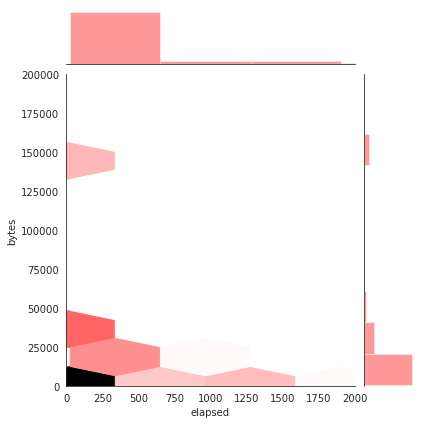

In [34]:
sns.jointplot(x='elapsed', y='bytes', data=df,
              kind='hex',
              color='r',
              xlim={0,2000}, ylim={0,200000}
             )

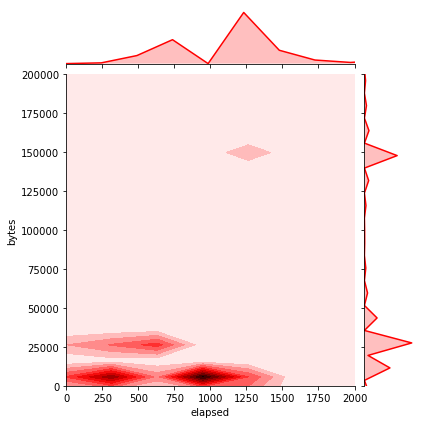

In [6]:
sns.jointplot(x='elapsed', y='bytes', data=df,
              kind='kde',
              color='r',
              xlim={0,2000}, ylim={0,200000}
             )
# spending too long

(-250, 2000)

(-5000, 30000)

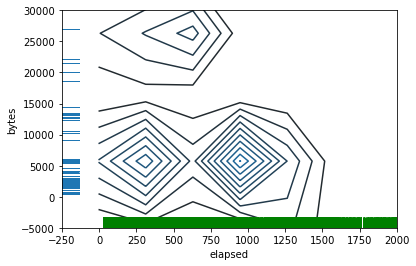

In [10]:
sns.kdeplot(df['elapsed'], df['bytes'])
sns.rugplot(df['elapsed'], color='g', height=0.05)
sns.rugplot(df['bytes'], vertical=True, height=0.05)
plt.xlim(-250,2000)
plt.ylim(-5000,30000)
# spending too long

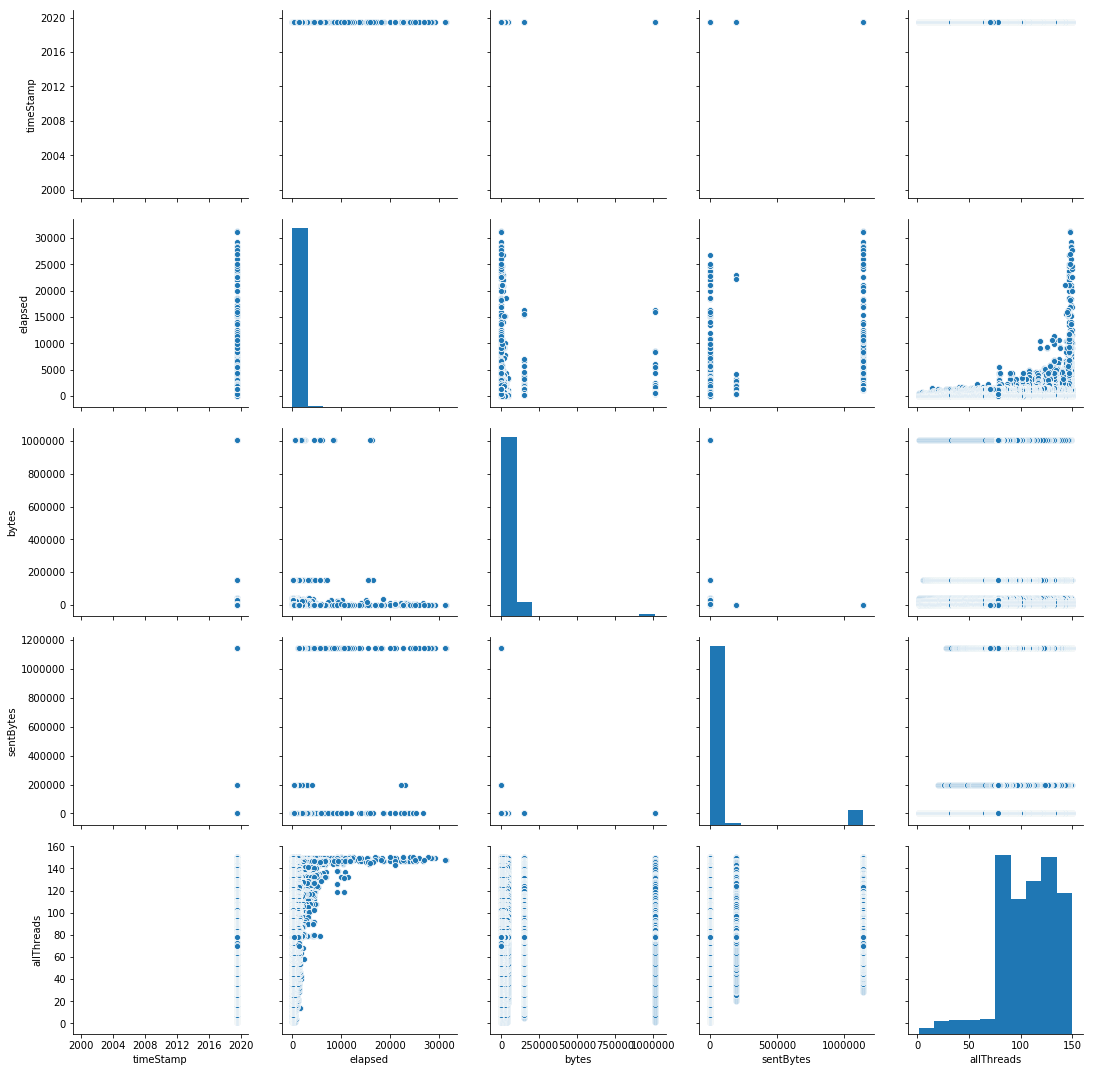

In [14]:
sns.pairplot(df, height=3, vars=['timeStamp', 'elapsed', 'bytes', 'sentBytes', 'allThreads'])

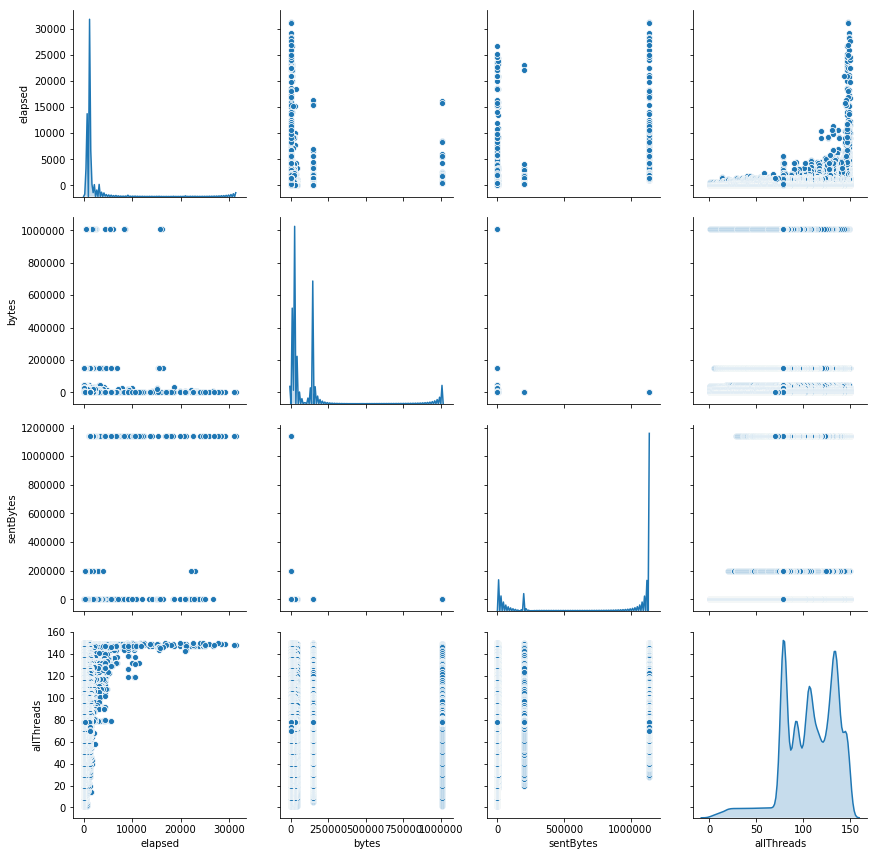

In [17]:
sns.pairplot(df, height=3, vars=['elapsed', 'bytes', 'sentBytes', 'allThreads'],
            diag_kind='kde')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77030 entries, 0 to 77029
Data columns (total 20 columns):
timeStamp          77030 non-null datetime64[ns]
elapsed            77030 non-null int64
label              77030 non-null object
responseCode       77030 non-null object
responseMessage    77030 non-null object
threadName         77030 non-null object
dataType           76312 non-null object
success            77030 non-null bool
failureMessage     0 non-null float64
bytes              77030 non-null int64
sentBytes          77030 non-null int64
grpThreads         77030 non-null int64
allThreads         77030 non-null int64
URL                77030 non-null object
Latency            77030 non-null int64
SampleCount        77030 non-null int64
ErrorCount         77030 non-null int64
Hostname           77030 non-null object
IdleTime           77030 non-null int64
Connect            77030 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(1), int64(10), object(7)
memory us

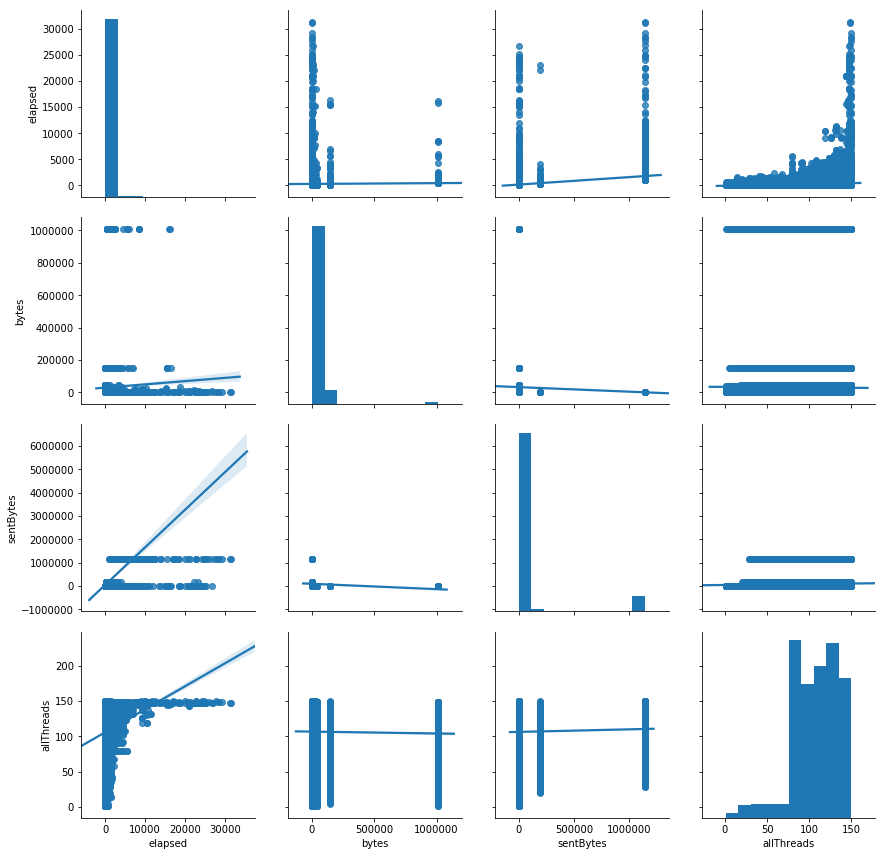

In [6]:
sns.pairplot(df, height=3, vars=['elapsed', 'bytes', 'sentBytes', 'allThreads'],
            kind='reg')
# spending too long

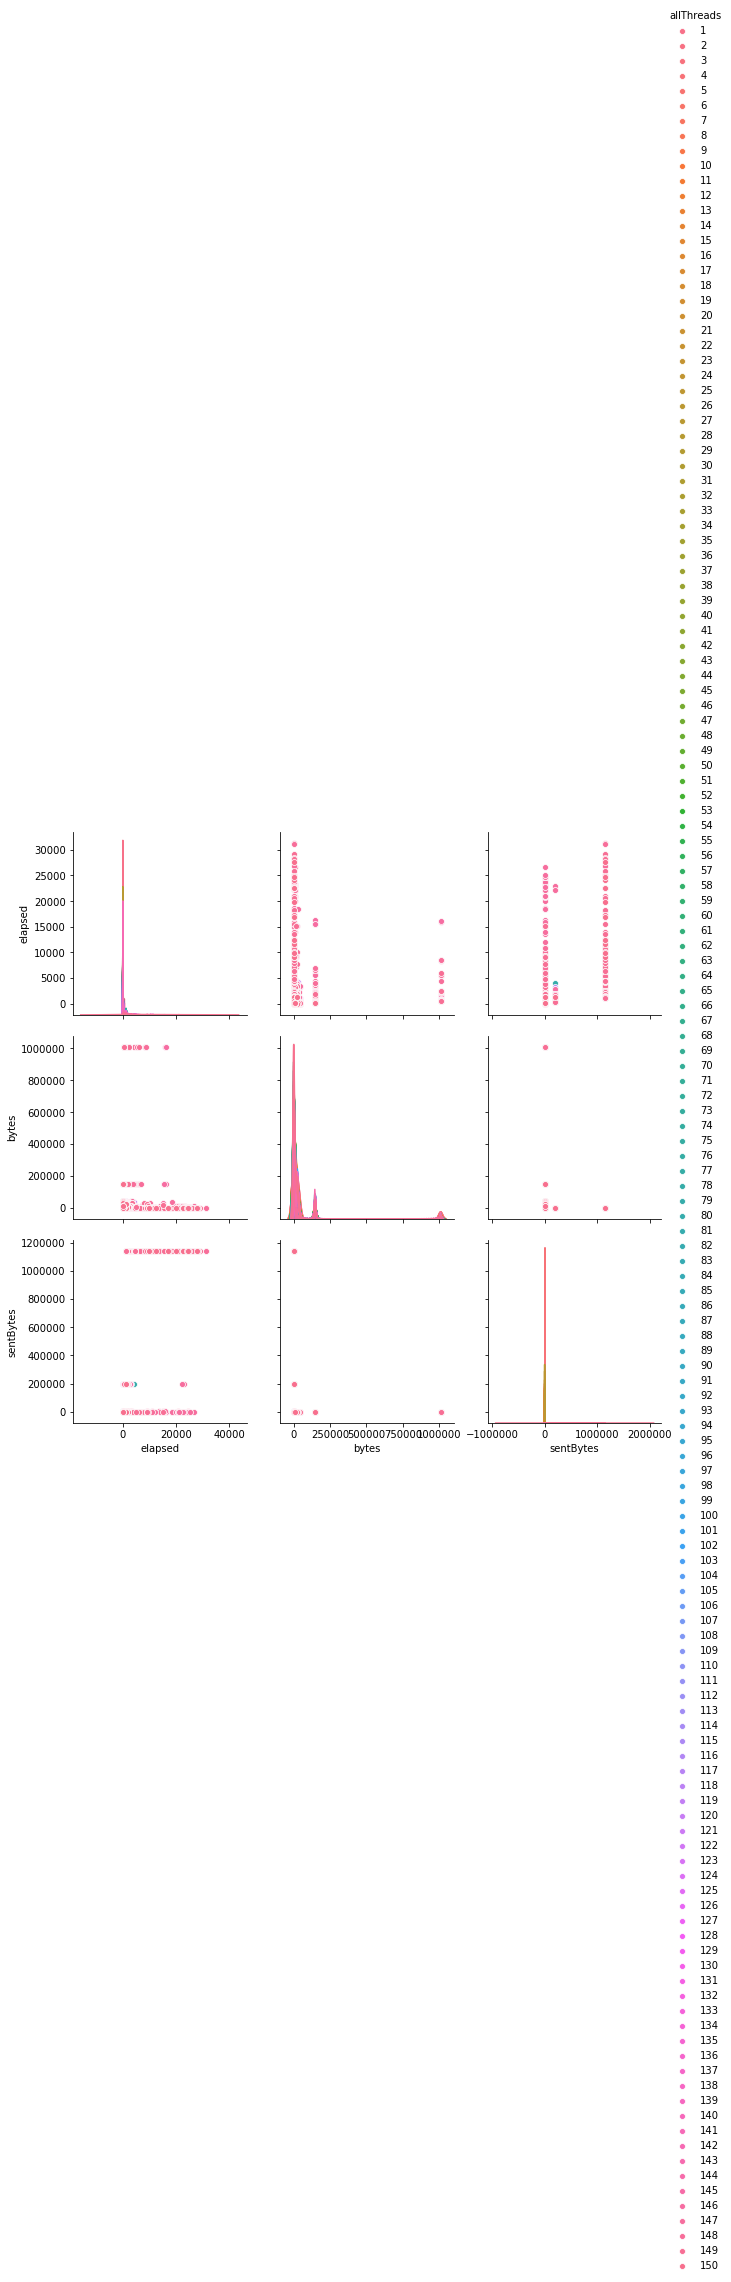

In [7]:
sns.pairplot(df, height=3, vars=['elapsed', 'bytes', 'sentBytes'],
            hue='allThreads')
# spending too long

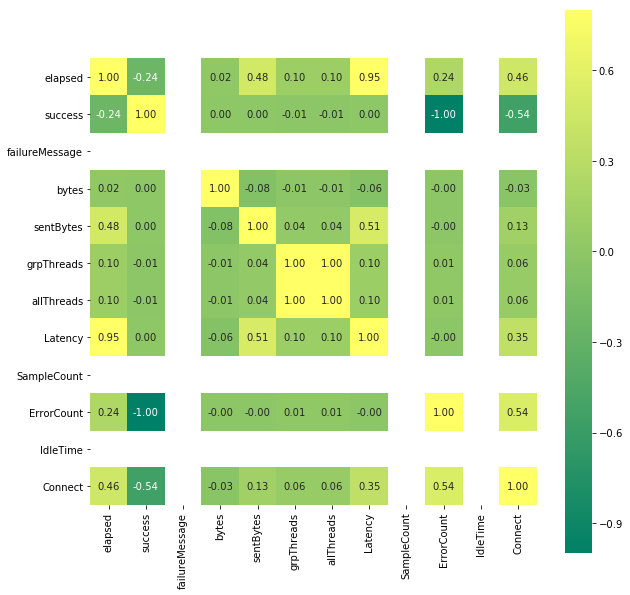

In [8]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f', cmap = "summer")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


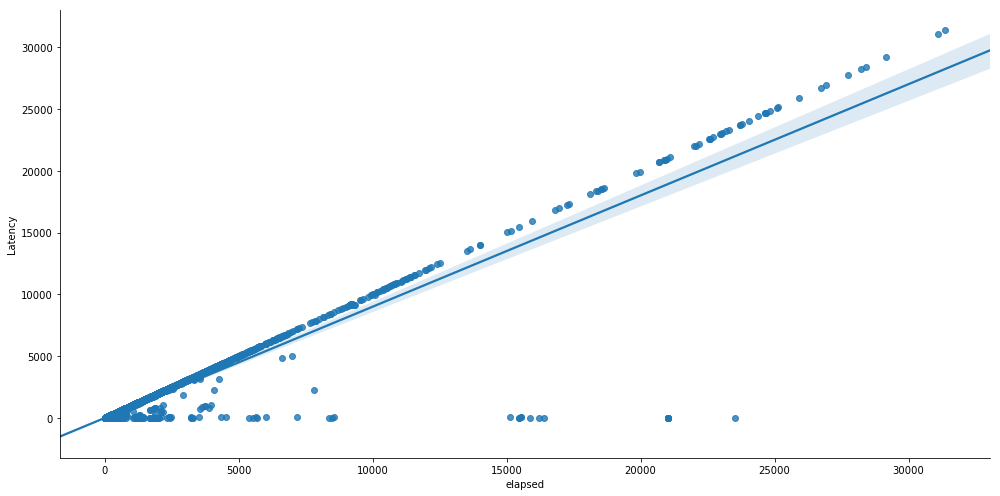

In [6]:
sns.lmplot(x='elapsed', y='Latency', data=df, height=7, aspect=2)

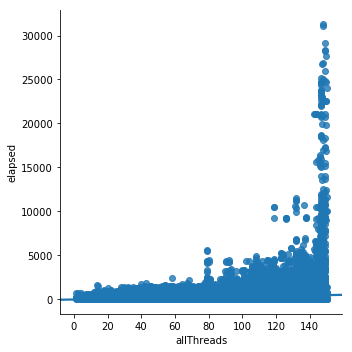

In [9]:
sns.lmplot(x='allThreads', y='elapsed', data=df, x_jitter=.1)

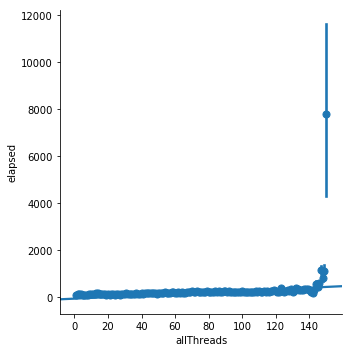

In [10]:
sns.lmplot(x='allThreads', y='elapsed', data=df, x_estimator=np.mean)